# **Entrega 3 código - Proyecto IIC2433 Minería de Datos**

**Grupo: 22**

Integrantes:

* Daniela Corral: 18637019
* Matías Masjuan: 18639399
* Belén Silva: 18627390
* Benjamín Vicente: 19637381

# 0) Instalación de dependencias

In [ ]:
# Esto puede ser ignorado si existen los archivos text.npy y text-title.npy
!python -m spacy download en_core_web_lg 
!pip install diskcache

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=c8697a54342f6a9a360dbf77c19b254cbb2e4fc924dce9c8cf3379521c5fff78
  Stored in directory: /tmp/pip-ephem-wheel-cache-n7k_jkuo/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
     |████████████████████████████████| 44 kB 2.2 MB/s 


In [ ]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.4) ======================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.2.5   ✔
package   en-core-web-lg   en_core_web_lg   2.2.5   ✔
link      en               en_core_web_sm   2.2.5   ✔



In [ ]:
from pathlib import Path
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/gdrive')

    if Path("/gdrive/Shareddrives/Proyecto Minería de Datos").exists():
        !cp "/gdrive/Shareddrives/Proyecto Minería de Datos/textv2.npy" "text.npy"
        !cp "/gdrive/Shareddrives/Proyecto Minería de Datos/text-title.npy" "text-title.npy"

Mounted at /gdrive


# 1) Definición del problema a analizar: *Fake news*

Las *fake news* (en español, noticias falsas) son un término referido a la divulgación de noticias falsas que provocan un peligroso círculo de desinformación. En el siglo XXI, las redes sociales y el internet han permitido que cualquier persona pueda ser creadora de contenido para la web, lo que ha facilitado la viralización de contenido engañoso, falso o fabricado. En efecto, un estudio de la revista Science (2018) demostró que las *fake news* son retuiteadas por hasta 100 veces más personas y mucho más rápido que la información genuina, especialmente al hablar de política ([Revista Science](https://www.science.org/doi/10.1126/science.aap9559)). Así, se generan círculos viciosos y una noticia falsa se puede replicar miles de veces en solo segundos. (FIP, p.1)

Queremos analizar el problema de detección de *fake news*. Para esto, usaremos los datos del ISOT Fake News Dataset, el cual está compuesto por dos archivos csv: “True.csv”, que contiene artículos de noticias reales recolectados desde el sitio de noticias *Reuters.com*; y “Fake.csv” que contiene artículos recolectados desde sitios poco confiables verificados por la organización estadounidense de fact-checking Politifact. 

**El plan es procesar las noticias con herramientas de procesamiento de lenguaje natural, y clasificar noticias como verdaderas o falsas de acuerdo a su contenido utilizando clasificadores como Naive Bayes y Decision Trees.**

# 2) Impacto del problema

La circulación de fake news no sólo desinforma a las personas impactando su derecho a la información, sino que además afecta a la sociedad en su conjunto y a la integridad democrática. Casos conocidos de fake news usualmente involucran elecciones presidenciales o decisiones políticas que afectan a países completos o, en el caso de las elecciones presidenciales de EEUU, al régimen mundial.


Por otro lado, la difusión de información falsa puede provocar como consecuencia aumentar la hostilidad y odio en contra de ciertos grupos vulnerables de la sociedad (FIP, p.11). Por ejemplo, si se desean ganar votos anti-inmigración, suelen publicarse noticias que adjudican aumento de crímenes o enfermedades de la mano al aumento de migrantes. 


Finalmente, las fake news no solo buscan desinformar para influenciar grandes eventos, sino que están presentes en miles de sitios web diariamente con el objetivo de generar dinero. Para esto, las personas utilizan engaños relacionados a problemas o acontecimientos que preocupan a grandes masas de personas, estando dispuestos a incluso generar pánico colectivo con tal de ganar más clicks y likes. 


Como grupo, opinamos que es innegable la enorme influencia que han ejercido las fake news hasta el momento, y todavía se desconoce el potencial impacto que podrían ser capaces de generar en eventos futuros. Creemos que es parte de nuestro rol como ingenieros en computación poner nuestro conocimiento al servicio de la comunidad (en este caso de los internautas) para poder brindar soluciones a problemas de ingeniería presentes en la vida real como éste y cooperar con nuestro grano de arena a hacer de internet y las RRSS mejores cada día. Por ello creemos que este proyecto será de alto impacto y muy contingente. 


**Fuentes partes 1 y 2:**
* ¿Qué son las Fake News?: guía para combatir la desinformación en la era de la posverdad | FIP. (2018). Recuperado de https://www.ifj.org/fileadmin/user_upload/Fake_News_-_FIP_AmLat.pdf
* ¿Qué son las Fake News? | UNAM Global. (2020, 31 de Mayo). Recuperado de https://unamglobal.unam.mx/que-son-las-fake-news
* ¿Por qué decimos cosas que sabemos que no son verdad? | Chequeado. (2020, 16 de Julio). Recuperado de https://chequeado.com/el-explicador/por-que-decimos-cosas-que-sabemos-que-no-son-verdad

# 3) Datos: limpieza y preparación

Lo primero será importar las librerías necesarias para la realización de este proyecto.

In [ ]:
import datetime
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### 3.1 Obtención de datos

A continuación, se cargarán los set de datos desde un link compartido en Dropbox y se verá una muestra de cada uno de ellos.

In [ ]:
!wget -O True.csv https://www.dropbox.com/s/tc43g22n8mm6718/True.csv?dl=0

--2021-12-18 21:06:07--  https://www.dropbox.com/s/tc43g22n8mm6718/True.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tc43g22n8mm6718/True.csv [following]
--2021-12-18 21:06:07--  https://www.dropbox.com/s/raw/tc43g22n8mm6718/True.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbabb94e1129d32a741d901666.dl.dropboxusercontent.com/cd/0/inline/BcGDLYgolHR96Az-o0z46CV493U1oMJcI16JZEbuQTrYOBG_KzUd4LOGtdEdPoK9rroHxfmat3gTtApH2kPKawhBj2zg_hqI-NDIogObem6lHyI8VLeK2TfksdsU94N0qwkBoTz64OwqUNYlyUTjggSQ/file# [following]
--2021-12-18 21:06:08--  https://ucdbabb94e1129d32a741d901666.dl.dropboxusercontent.com/cd/0/inline/BcGDLYgolHR96Az-o0z46CV493U1oMJcI16JZEbuQTrYOBG_KzUd4LOGtdEdPoK9rroHxfmat3gTtApH2kPKawhBj2zg_hqI-

In [ ]:
!wget -O Fake.csv https://www.dropbox.com/s/yqnpv3nr0gemy5a/Fake.csv?dl=0

--2021-12-18 21:06:10--  https://www.dropbox.com/s/yqnpv3nr0gemy5a/Fake.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yqnpv3nr0gemy5a/Fake.csv [following]
--2021-12-18 21:06:10--  https://www.dropbox.com/s/raw/yqnpv3nr0gemy5a/Fake.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc46f0523888c32ed899f12682e6.dl.dropboxusercontent.com/cd/0/inline/BcEQJ8W3r6HuxuLW-WxtcujlatBYfEjsbIQI2z3Fr8Ly1iyjUgWx0G6m3bgjIS9EkA382DowmpUFsWV07DoqyNFeATWTkmF_dBN1x43FUY6gF_ejMpr_7UBTPyRCqq60ORhOIrkpUyeGJtgIL5g2Xkg-/file# [following]
--2021-12-18 21:06:11--  https://uc46f0523888c32ed899f12682e6.dl.dropboxusercontent.com/cd/0/inline/BcEQJ8W3r6HuxuLW-WxtcujlatBYfEjsbIQI2z3Fr8Ly1iyjUgWx0G6m3bgjIS9EkA382DowmpUFsWV07DoqyNFeATWTkmF_d

In [ ]:
df_falsos = pd.read_csv("Fake.csv")
df_verdaderos = pd.read_csv("True.csv")

In [ ]:
df_falsos.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_verdaderos.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


A partir de lo anterior, observamos que ambos datasets poseen los mismos atributos/features:

* ```title```: Corresponde al título de la publicación o artículo. Es de tipo ***string*** (más bien ***text*** dada su extensión)
* ```text```: Corresponde al cuerpo de la publicación o artículo. Es de tipo string (más bien ***text*** dada su extensión)
* ```subject```: Corresponde al tema del que habla la publicación o artículo. Es de tipo ***string***
* ```date```: Corresponde a la fecha de publicación. Es de tipo ***date***


**¿Son estos features independientes entre si?** Estos atributos claramente son independientes. Digamos que cada uno puede existir individualmente sin depender de otro atributo. Sin embargo, recordemos que cada uno de estos atributos son características de una noticia, por lo que evidentemente tienen cierta relación. Por ejemplo, el título puede influenciar en lo que dice en el texto, y también se relaciona con la temática en un sentido **semántico**, es decir, en el significado humano y cognitivo que se le da al texto. Sin embargo, no están relacionados en términos **sintácticos** (que es lo que lee la máquina), por lo que es posible establecer una independencia entre estos atributos.

Respecto a los valores de los features, se observa que los títulos y el texto corresponde a un dato propio de cada entidad. Por otro lado, la columna **subject**, la cual nos da cuenta de la temática de la noticia, tiene una cantidad limitada de categorías.

Para el dataset ```df_falsos``` existen 6 categorías para este atributo: \[ *News, politics, left-news, Government News, US_news, Middle-east* \]

In [ ]:
df_falsos['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

Por otra parte, para el dataset ```df_verdaderos``` existen solo 2:
\[ *politicsNews, worldnews* \]

In [ ]:
df_verdaderos['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Si queremos hacer un join de estos dataset es necesario tener en cuenta este atributo para relacionar estos sets categóricos distintos. Por ejemplo, *politics* y p*oliticsNews* hacen referencia a publicaciones políticas, y no tendría sentido tratarlos como categorías diferentes.

Otro de los problemas que tienen estos datasets es el tipo de dato o *datatype* de las columnas. No podemos simplemente manejar los textos en su forma completa, sino que es necesario aplicar algún tipo de algoritmo para vectorizar la información entregada y que sea posible entrenar los modelos que tenemos con ella.

Existen otro tipo de consideraciones que es necesario tener en cuenta, como el uso de *stopwords*, las cuales son palabras que se usan en todas las oraciones pero que no tienen una relación directa con la etiqueta de clasificación (noticia falsa o verdadera). **De esto se explicará en mayor detalle más adelante**.

### 3.2 Limpieza de datos

En esta sección se limpiarán los datos y se añadirán/quitarán columnas para beneficiar el mecanismo de procesamiento de la información.

A continuación se crea la función `cast_date`, que transforma el formato de la fecha para darle un tipo de dato *date*, en lugar de que solo sea un texto con la fecha escrita. De este modo nos será más fácil aplicar operaciones numéricas.

In [ ]:
def cast_date(obj: str, *, fs: "list[str]" = ["%B %d, %Y", "%d-%b-%y", "%b %d, %Y"]) -> datetime.date:
    for f in fs:
        try:
            return datetime.datetime.strptime(obj.strip(), f)
        except ValueError: continue
    warnings.warn(f"{repr(obj)} is not a date")
    return None

También se crea la función `unify_politic_news` que unificará las categorías 'politicsNews' y 'politics' como una única categoría 'politicsNews'. Si bien para la entrega pasada de este proyecto se utilizaron solamente noticias de tema político, para esta entrega se propuso utilizar la totalidad de las noticias. Por ende, la columna `subject` será importante.

In [ ]:
def unify_politic_news(category):
    if category == 'politics':
        return 'politicsNews'
    return category

A continuación se genera el *dataset* `df_all`, el cual agrupa los dos dataset anteriores en uno solo. Además, aplica la función de transformación de fecha y se hace shuffle de sus datos.

In [ ]:
#Se generan dataframes temporales
df_falsos_temp = df_falsos.copy()
df_verdaderos_temp = df_verdaderos.copy()

#Agregamos nueva columna is_fake
df_falsos_temp['is_fake'] = True
df_verdaderos_temp['is_fake'] = False

#Juntamos datasets de noticias reales con las falsas
df_all = pd.concat([df_falsos_temp, df_verdaderos_temp])
df_all['date'] = df_all['date'].apply(cast_date)
df_all['subject'] = df_all['subject'].apply(unify_politic_news)

df_all = df_all.sample(frac=1, random_state=3).reset_index(drop=True)

#Borramos datasets temporales
del df_falsos_temp, df_verdaderos_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/' is not a date
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/' is not a date
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/' is not a date
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg' is not a date
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg' is not a d

In [ ]:
len(df_all)

44898

#### Datos nulos
Una parte importantísima de la limpieza de cualquier base de datos es limpiar filas con datos nulos. A continuación se hace dicha limpieza.

In [ ]:
df_all = df_all.dropna()

In [ ]:
len(df_all)

44888

#### Datos duplicados

A continuación se observan los datos y se busca información duplicada.

In [ ]:
# Borramos filas completamente duplicadas (si hubieran)
df_all = df_all.drop_duplicates()

In [ ]:
len(df_all)

44679

Al ejecutar el comando anterior, se deberían haber borrado del dataset todo dato tal que el valor de cada una de sus features es igual al de otro dato al mismo tiempo. Sin embargo, es dificil que una situación así pueda ocurrir. En muchos casos, existe la posibilidad de que solo el título se encuentre duplicado en muchas filas, o que el texto se encuentre duplicado, pero que los otros atributos también sean distintos. Dado que trabajaremos solo con el texto y título de las noticias, nos interesa que esos datos sean los que no estén repetidos en varias noticias.

In [ ]:
df_all = df_all.drop_duplicates(subset=['title','text'])
df_all.reset_index(drop=True, inplace=True)

In [ ]:
len(df_all)

39099

Finalmente, observamos estadísticas de nuestro dataset completamente limpio.

In [ ]:
df_all.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,title,text,subject,date,is_fake
count,39099,39099,39099,39099,39099
unique,38723,38640,7,1010,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,2017-12-06 00:00:00,False
freq,14,445,15881,177,21197
first,NaN,NaN,NaN,2015-03-31 00:00:00,NaN
last,NaN,NaN,NaN,2018-02-19 00:00:00,NaN


La proporción de noticias falsas vs verdaderas en los datos es la siguiente:

In [ ]:
df_all['is_fake'].value_counts()

False    21197
True     17902
Name: is_fake, dtype: int64

<BarContainer object of 2 artists>

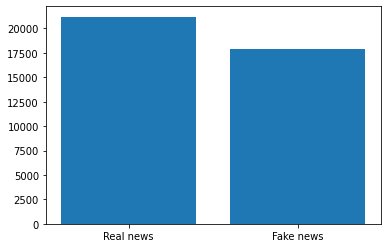

In [ ]:
plt.bar(['Real news', 'Fake news'], df_all['is_fake'].value_counts())

Y la cantidad de noticias por categoría se presenta a continuación:

In [ ]:
df_all['subject'].value_counts()

politicsNews       15881
worldnews           9986
News                9050
left-news           2484
Government News      915
US_News              397
Middle-east          386
Name: subject, dtype: int64

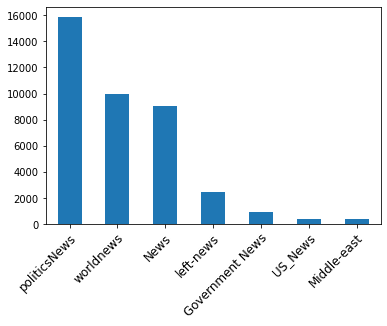

In [ ]:
fig, ax = plt.subplots()
df_all['subject'].value_counts().plot.bar(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45, ha="right", rotation_mode='anchor')
fig.savefig("dist-noticias.pdf", bbox_inches='tight')

#### Procesamiento de las noticias con herramientas de PLN

Utilizaremos la librería `spaCy`, un ***natural language toolkit***, para aplicar procesamiento del lenguaje natural que nos permita extraer la mayor cantidad de información de nuestras noticias.

In [ ]:
# Esto puede ser ignorado si existen los archivos text.npy y text-title.npy
import spacy
nlp = spacy.load("en_core_web_lg")

La función `process_text` nos ayuda a aplicar *word embeddings* de Spacy. En esta técnica se pide directamente a Spacy el vector que representa a cada frase recibida. Además, utilizamos un sistema de caché para que en caso de que desee calcular el vector de alguna frase que ya fue procesada, se entregue inmediatamente ese resultado.

In [ ]:
# Esto puede ser ignorado si existen los archivos text.npy y text-title.npy
import functools
import diskcache

process_text_cache = diskcache.Cache(
    directory="/gdrive/Shareddrives/Proyecto Minería de Datos/process_text_cache_v2/"
)

@process_text_cache.memoize()
def process_text(text):
    return nlp(text).vector

Una vez transformado el texto eliminando las stop words junto con las transformaciones de palabras por sus respectivos lemas, entre otros procesamiento del lenguaje natural, se guarda un nuevo dataframe con los textos procesados con la finalidad de tener rápido acceso al dataset con el que trabajaremos de aquí en adelante y no necesitar correr el código con PLN otra vez.

In [ ]:
#Si existe un archivo text.npy (con los textos procesados), lo usamos y evitamos la hora de 
#procesamiento con PLN
saved_text_path = Path('text.npy')
if saved_text_path.exists():
    with saved_text_path.open("rb") as f:
        text = np.load(f)

# En caso contrario, procesamos los datos y los guardamos en un archivo para no volver a correrlo
else:
    text = np.vectorize(process_text, signature="()->(k)")(df_all['text'].to_numpy())  # 57 minutos
    with saved_text_path.open("wb") as f:
        np.save(f, text)

In [ ]:
#Idem que la celda superior, pero en este caso con los textos y títulos de las noticias
saved_text_path = Path('text-title.npy')

if saved_text_path.exists():
    with saved_text_path.open("rb") as f:
        textPlusTitle = np.load(f)
else: 
    df_textPlusTitle = df_all['title'] + df_all['text']
    textPlusTitle = np.vectorize(process_text, signature="()->(k)")(df_textPlusTitle.to_numpy())  # ?? minutos
    with saved_text_path.open("wb") as f:
        np.save(f, textPlusTitle)

### 3.3 Vectorizador y separación de Xtrain e Xtest
Ahora que tenemos nuestro dataset preparado, es hora de definir la matriz X y el vector y, además de separar en set de train y de test con los que probaremos los clasificadores de noticias.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

Nos interesaba para esta entrega final analizar los efectos de considerar además del contenido de la noticia a sus titulares. Para esto, se definirá como `X` a la matriz de datos que considera solamente los textos de las noticias para clasificarlas...

In [ ]:
X = text
y = df_all[['is_fake', 'subject']]

... y se definirá como `X2` a la matriz de datos que considera tanto el título de la noticia como su contenido de texto para clasificar las noticias.

In [ ]:
X2 = textPlusTitle

A continuación se presentan las dimensiones de la matriz `X` y de la matriz `X2`.

In [ ]:
X.shape

(39099, 300)

In [ ]:
X2.shape

(39099, 300)

Dado que 300 dimensiones es un número de features razonable, no será necesario aplicar técnicas de reducción de datos. 

Recordemos, además, que después de la etapa de procesamiento de datos nos quedamos un dataset de 39.099 noticias, de diferentes temáticas.

Procedemos a separar el set de train y el set de test en una proporción 80/20, para ambas matrices `X` y `X2`:

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=34)
print('\nTotal number of samples in the Train Dataset :', Xtrain.shape[0])
print('Total number of samples in the Test Dataset :', Xtest.shape[0])


Total number of samples in the Train Dataset : 31279
Total number of samples in the Test Dataset : 7820


In [ ]:
X2train, X2test, y2train, y2test = train_test_split(X2, y, test_size=0.2,random_state=34)
print('\nTotal number of samples in the Train Dataset :', X2train.shape[0])
print('Total number of samples in the Test Dataset :', X2test.shape[0])


Total number of samples in the Train Dataset : 31279
Total number of samples in the Test Dataset : 7820


# 4) Entrenamiento y resultados

#### **Naive Bayes**

El clasificador Bayesiano ingenuo es un clasificador probabilístico basado en la Teoría de Bayes. Su algoritmo, dada una instancia de una clase (es decir, dados los valores de sus atributos), busca maximizar la probabilidad de ocurrencia de la clase real de esa instancia. 

Este es un algoritmos de aprendizaje de máquina
muy utilizado en la práctica. Tiene aplicaciones
exitosas en diagnósticos médicos, clasificación de
texto, entre otros.

En esta ocasión, el algoritmo calculará la probabilidad de que cada noticia pueda ser considerada falsa o verdadera, y finalmente tomará la decisión en base a cuál máximiza esta probabilidad. Creemos que Naive Bayes será sumamente útil para determinar si un texto es considerado como falso o no. Esto se debe a que la matriz X generada tiene columnas independientes gracias al vectorizer, pues cada columna será un conteo de cuántas veces aparece una cierta palabra en el texto, y cada palabra sería independiente de otra gracias al procesamiento de lenguaje natural que ya se hizo. Además, Naive Bayes es muy rápido aún si el dataset es extenso, lo cual nos favorece pues tenemos un gran dataset de noticias.

A continuación se aplica Naive Bayes considerando **sólo los textos** de las noticias:

In [ ]:
bnb = GaussianNB().fit(Xtrain, ytrain['is_fake'])
print('\nAccuracy score :',bnb.score(Xtest, ytest['is_fake']))


Accuracy score : 0.8985933503836318


y ahora se aplica Naive Bayes considerando tanto los **títulos** como los **textos** de las noticias:

In [ ]:
bnb2 = GaussianNB().fit(X2train, y2train['is_fake'])
print('\nAccuracy score :',bnb2.score(X2test, y2test['is_fake']))


Accuracy score : 0.8843989769820972


Podemos observar que, pese a que los accuracys obtenidos son bastante similares, al agregar los títulos de las noticias el accuracy baja de un **89.85%** a un **88.43%**. Veamos un poco más de cerca los resultados:

**Matrices de confusión:**

In [ ]:
ypred = bnb.predict(Xtest)
y2pred = bnb2.predict(X2test)
cm = confusion_matrix(ytest['is_fake'], ypred)
cm2 = confusion_matrix(y2test['is_fake'], y2pred)

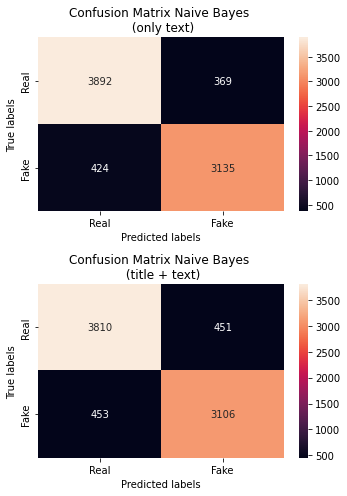

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,7))
categorias = ['Real', 'Fake'] #0: Real, 1: Fake

sns.heatmap(cm, annot=True, ax = ax1, fmt='g');
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix Naive Bayes \n (only text)'); 
ax1.xaxis.set_ticklabels(categorias); 
ax1.yaxis.set_ticklabels(categorias);

sns.heatmap(cm2, annot=True, ax = ax2, fmt='g');
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix Naive Bayes \n (title + text)'); 
ax2.xaxis.set_ticklabels(categorias); 
ax2.yaxis.set_ticklabels(categorias);

fig.tight_layout()
plt.show()

fig.savefig("CM-NB.pdf", bbox_inches='tight')

**Reporte de precision y recall:**

Recordar que el vector `y` viene de la columna del dataset `is_fake`, que es True (1) cuando la noticia es falsa y es False (0) cuando la noticia es clasificada como real.

In [ ]:
print('Classification Report (only text):\n\n',classification_report(ytest['is_fake'], ypred))

Classification Report (only text):

               precision    recall  f1-score   support

       False       0.90      0.91      0.91      4261
        True       0.89      0.88      0.89      3559

    accuracy                           0.90      7820
   macro avg       0.90      0.90      0.90      7820
weighted avg       0.90      0.90      0.90      7820



In [ ]:
print('Classification Report (text + title):\n\n',classification_report(y2test['is_fake'], y2pred))

Classification Report (text + title):

               precision    recall  f1-score   support

       False       0.89      0.89      0.89      4261
        True       0.87      0.87      0.87      3559

    accuracy                           0.88      7820
   macro avg       0.88      0.88      0.88      7820
weighted avg       0.88      0.88      0.88      7820



**Noticias mal clasificadas por temática:**

A continuación se muestra un gráfico de torta que muestra las noticias mal clasificadas (solo considerando su texto), separadas por temáticas:

In [ ]:
colorsitos = plt.get_cmap('Set2').colors
print(colorsitos)

((0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254))


In [ ]:
results = ytest.copy()
results['pred'] = ypred
results.head()

,is_fake,subject,pred
9475,True,US_News,True
18140,False,politicsNews,False
6115,True,News,True
13852,True,left-news,False
18781,True,Middle-east,False


In [ ]:
df_errors_nb = results[results['is_fake'] != results['pred']]

In [ ]:
nb_errors = df_errors_nb.groupby('subject').size()
nb_errors

subject
Government News     64
Middle-east         23
News                71
US_News             22
left-news           85
politicsNews       395
worldnews          133
dtype: int64

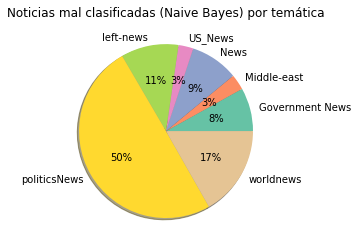

In [ ]:
plt.pie(nb_errors, labels = nb_errors.index.values.tolist(), autopct='%1.0f%%', colors=colorsitos, shadow=True)
plt.title('Noticias mal clasificadas (Naive Bayes) por temática')
plt.savefig("pie-NB-mal-clasificadas.pdf", bbox_inches='tight')
plt.show()

Y ahora se realiza el mismo procedimiento pero considerando los textos sumados a los títulos de las noticias:

In [ ]:
results2 = y2test.copy()
results2['pred'] = y2pred
results2.head()

,is_fake,subject,pred
9475,True,US_News,True
18140,False,politicsNews,False
6115,True,News,True
13852,True,left-news,False
18781,True,Middle-east,False


In [ ]:
df_errors_nb2 = results2[results2['is_fake'] != results2['pred']]

In [ ]:
nb2_errors = df_errors_nb2.groupby('subject').size()
nb2_errors

subject
Government News     74
Middle-east         21
News                60
US_News             20
left-news           91
politicsNews       508
worldnews          130
dtype: int64

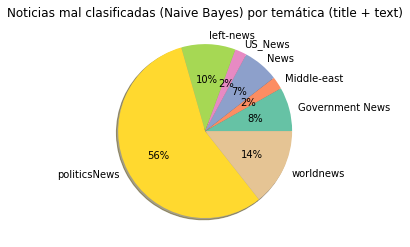

In [ ]:
plt.pie(nb2_errors, labels = nb2_errors.index.values.tolist(), autopct='%1.0f%%', colors=colorsitos, shadow=True)
plt.title('Noticias mal clasificadas (Naive Bayes) por temática (title + text)')
plt.savefig("pie-NB-mal-clasificadas-con-titulo.pdf", bbox_inches='tight')
plt.show() 

#### **Decision Tree**

Los **árboles de decisión** son una técnica de aprendizaje supervisado en la que se recrea un árbol cuyos nodos internos representan atributos y sus conexiones/aristas representan valores de esos atributos. Las hojas de este árbol corresponderán a las clases que tiene nuestro problema. El árbol solo puede tomar decisiones discretas, por lo que en caso de tener atributos continuos se deberá discretizar el intervalo. 

Por otro lado, el gran problema de los árboles de decisión es que tienden fuertemente al *overfitting*. En teoría, si dejáramos al árbol crear la mejor estructura que pueda, lo que haría sería dividir tanto los datos que en cada nodo hoja quedaría 1 solo dato en el peor caso, con un accuracy de 100% ya que la estructura se adaptó para clasificar bien todos los datos con los que se le entrenó. Sin embargo, es difícil que esa estructura aplique para otros datos. Por esta razón se setea un segundo hiperparámetro llamado ``max_depth``, que intenta evitar el overfitting poniéndole limites a la clasificación del árbol en profundidad. 

A continuación se aplica el método de clasificación de Decision Tree considerando **sólo los textos** de las noticias:

In [ ]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0).fit(Xtrain, ytrain['is_fake'])
print('\nAccuracy score :', dtree.score(Xtest, ytest['is_fake']))


Accuracy score : 0.8971867007672635


y ahora se aplica Decision Tree considerando tanto los **títulos** como los **textos** de las noticias:

In [ ]:
dtree2 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X2train, y2train['is_fake'])
print('\nAccuracy score :', dtree2.score(X2test, y2test['is_fake']))


Accuracy score : 0.8920716112531969


Podemos observar que, pese a que los accuracys obtenidos son bastante similares, al agregar los títulos de las noticias el accuracy baja de un **89.71%** a un **89.2%**. También podemos apreciar que los accuracys entre Naive Bayes y Decision Tree son muy similares, y aunque Naive Bayes alcanza el mayor accuracy con un 89.85% al solo considerar los textos, al considerar los títulos más el texto, Decision Tree tiene un mejor accuracy que Naive Bayes.

Analicemos un poco más los resultados del Decision Tree:

In [ ]:
ypred = dtree.predict(Xtest)
y2pred = dtree2.predict(X2test)
cm = confusion_matrix(ytest['is_fake'], ypred)
cm2 = confusion_matrix(y2test['is_fake'], y2pred)

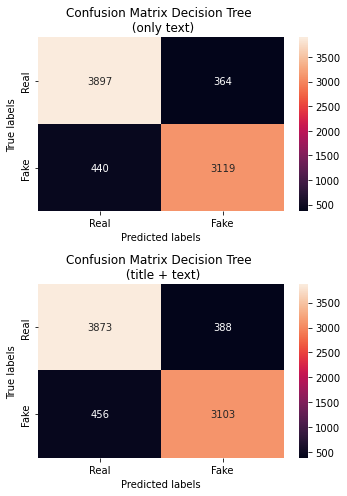

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,7))
categorias = ['Real', 'Fake'] #0: Real, 1: Fake

sns.heatmap(cm, annot=True, ax = ax1, fmt='g');
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix Decision Tree \n (only text)'); 
ax1.xaxis.set_ticklabels(categorias); 
ax1.yaxis.set_ticklabels(categorias);

sns.heatmap(cm2, annot=True, ax = ax2, fmt='g');
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix Decision Tree \n (title + text)'); 
ax2.xaxis.set_ticklabels(categorias); 
ax2.yaxis.set_ticklabels(categorias);

fig.tight_layout()
plt.show()

fig.savefig("CM-DT.pdf", bbox_inches='tight')

**Reporte de precision y recall:**

Recordar que el vector `y` viene de la columna del dataset `is_fake`, que es True (1) cuando la noticia es falsa y es False (0) cuando la noticia es clasificada como real.

In [ ]:
print('Classification Report (only text):\n\n',classification_report(ytest['is_fake'], ypred))

Classification Report (only text):

               precision    recall  f1-score   support

       False       0.90      0.91      0.91      4261
        True       0.90      0.88      0.89      3559

    accuracy                           0.90      7820
   macro avg       0.90      0.90      0.90      7820
weighted avg       0.90      0.90      0.90      7820



In [ ]:
print('Classification Report (text + title):\n\n',classification_report(y2test['is_fake'], y2pred))

Classification Report (text + title):

               precision    recall  f1-score   support

       False       0.89      0.91      0.90      4261
        True       0.89      0.87      0.88      3559

    accuracy                           0.89      7820
   macro avg       0.89      0.89      0.89      7820
weighted avg       0.89      0.89      0.89      7820



**Noticias mal clasificadas por temática:**

A continuación se muestra un gráfico de torta que muestra las noticias mal clasificadas (solo considerando su texto), separadas por temáticas:

In [ ]:
results = ytest.copy()
results['pred'] = ypred
results.head()

,is_fake,subject,pred
9475,True,US_News,True
18140,False,politicsNews,False
6115,True,News,True
13852,True,left-news,False
18781,True,Middle-east,False


In [ ]:
df_errors_dtree = results[results['is_fake'] != results['pred']]

In [ ]:
dtree_errors = df_errors_dtree.groupby('subject').size()
dtree_errors

subject
Government News     51
Middle-east         22
News               113
US_News             25
left-news           80
politicsNews       364
worldnews          149
dtype: int64

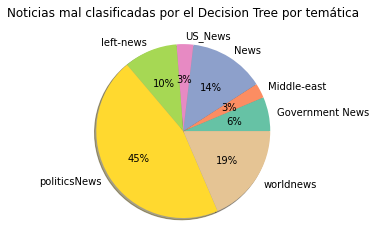

In [ ]:
plt.pie(dtree_errors, labels = dtree_errors.index.values.tolist(), autopct='%1.0f%%', colors=colorsitos, shadow=True)
plt.title('Noticias mal clasificadas por el Decision Tree por temática')
plt.savefig("pie-DT-mal-clasificadas.pdf", bbox_inches='tight')
plt.show() 

Y ahora se realiza el mismo procedimiento pero considerando los textos sumados a los títulos de las noticias:

In [ ]:
results2 = y2test.copy()
results2['pred'] = y2pred
results2.head()

,is_fake,subject,pred
9475,True,US_News,True
18140,False,politicsNews,False
6115,True,News,True
13852,True,left-news,True
18781,True,Middle-east,False


In [ ]:
df_errors_dtree2 = results2[results2['is_fake'] != results2['pred']]

In [ ]:
dtree2_errors = df_errors_dtree2.groupby('subject').size()
dtree2_errors

subject
Government News     51
Middle-east         28
News               107
US_News             23
left-news           87
politicsNews       391
worldnews          157
dtype: int64

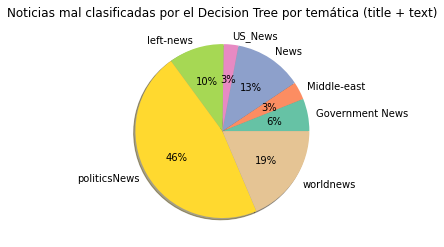

In [ ]:
plt.pie(dtree2_errors, labels = dtree2_errors.index.values.tolist(), autopct='%1.0f%%', colors=colorsitos, shadow=True)
plt.title('Noticias mal clasificadas por el Decision Tree por temática (title + text)')
plt.savefig("pie-DT-mal-clasificadas-con-titulo.pdf", bbox_inches='tight')
plt.show() 